In [3]:
import statistics as st

In [4]:
h = (
    76.0,
    72.0,
    71.0,
    74.0,
    71.0,
    69.0,
    68.0,
    68.0,
    66.0,
    64.0,
    65.0,
    63.0,
    63.0,
    62.0,
    65.0,
    63.0,
    65.0,
    64.0,
    64.0,
)
m = (
    5,
    5,
    21,
    30,
    42,
    20,
    20,
    35,
    80,
    120,
    140,
    180,
    205,
    225,
    237,
    280,
    300,
    356,
    360,
)

Let us do all the univariate analysis for $h$:

In [5]:
st.mean(h)

67.0

In [6]:
st.median(h)

65.0

In [17]:
[value for value in h if value <= 64]

[64.0, 63.0, 63.0, 62.0, 63.0, 64.0, 64.0]

In [19]:
[value for value in h if value > 64 and value <= 68.3]

[68.0, 68.0, 66.0, 65.0, 65.0, 65.0]

In [20]:
[value for value in h if value > 68.3]

[76.0, 72.0, 71.0, 74.0, 71.0, 69.0]

In [22]:
st.quantiles(h, n=4)

[64.0, 65.0, 71.0]

In [11]:
st.stdev(h)

4.123105625617661

In [23]:
st.variance(h)

17.0

In [24]:
min(h)

62.0

In [25]:
max(h)

76.0

Let us repeat this for $m$:

In [28]:
st.mean(m)

140.05263157894737

In [29]:
st.median(m)

120

In [30]:
st.quantiles(m, n=4)

[21.0, 120.0, 237.0]

In [31]:
st.stdev(m)

124.46662813970593

In [32]:
st.variance(m)

15491.941520467837

In [33]:
min(m)

5

In [34]:
max(m)

360

Let us calculate the Pearson correlation coefficient:

In [36]:
st.correlation(h, m)

-0.7686142969026402

In [37]:
st.correlation(m, h)

-0.7686142969026402

In [38]:
st.correlation?

Signature: st.correlation(x, y, /, *, method='linear')
Docstring:
Pearson's correlation coefficient

Return the Pearson's correlation coefficient for two inputs. Pearson's
correlation coefficient *r* takes values between -1 and +1. It measures
the strength and direction of a linear relationship.

>>> x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
>>> y = [9, 8, 7, 6, 5, 4, 3, 2, 1]
>>> correlation(x, x)
1.0
>>> correlation(x, y)
-1.0

If *method* is "ranked", computes Spearman's rank correlation coefficient
for two inputs.  The data is replaced by ranks.  Ties are averaged
so that equal values receive the same rank.  The resulting coefficient
measures the strength of a monotonic relationship.

Spearman's rank correlation coefficient is appropriate for ordinal
data or for continuous data that doesn't meet the linear proportion
requirement for Pearson's correlation coefficient.
File:      /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/statistics.py
Type:      function

To calculate a line of best fit between $x=\ln(m)$ and $y=\ln(h)$ let us first create $x$ and $y$:

In [54]:
import math
x = [math.log(value) for value in m]
y = [math.log(value) for value in h]

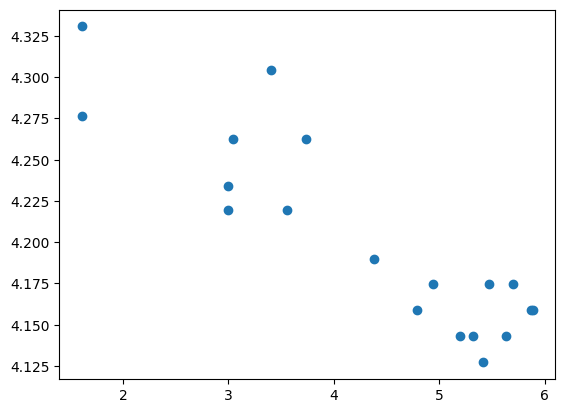

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y);

In [59]:
slope, intercept = st.linear_regression(x, y)

In [61]:
slope

-0.03854770754231997

In [62]:
intercept

4.368415819445762

Text(0, 0.5, '$y$')

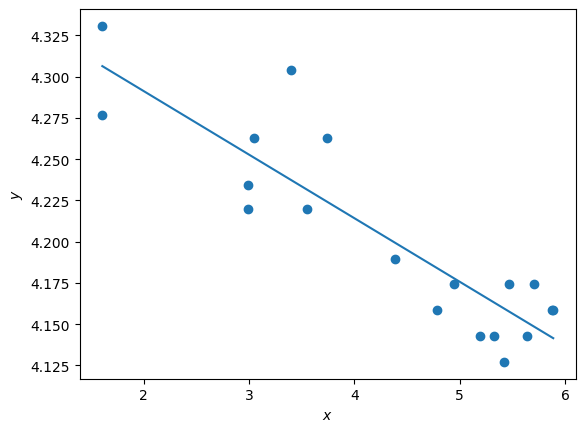

In [63]:
start_point, end_point = min(x), max(x)
image_start_point = slope * start_point + intercept
image_end_point = slope * end_point + intercept

plt.figure()
plt.scatter(x, y)
plt.plot((start_point, end_point), (image_start_point, image_end_point))
plt.xlabel("$x$")
plt.ylabel("$y$")

The next question asks for a relationship of the form $h=cm^k$

We have just found a relationship of the form $y=ax + b$.

Where $a$ is the slope:

In [64]:
slope

-0.03854770754231997

and $b$ is the intercept:

In [65]:
intercept

4.368415819445762

Let us manipulate the expressions we have using Sympy.

In [66]:
import sympy as sym

h = sym.Symbol("h")
m = sym.Symbol("m")
a = sym.Symbol("a")
b = sym.Symbol("b")
x = sym.ln(m)
y = sym.ln(h)

In [68]:
line = sym.Eq(lhs=y, rhs=a * x + b)
line

Eq(log(h), a*log(m) + b)

In [69]:
sym.exp(line.lhs)

h

In [70]:
sym.exp(line.rhs)

exp(a*log(m) + b)

This expression can be rewritten as:

$$
e^be^{a\ln(m)}
$$

which in turn can be rewritten as:

$$
e^bm^a
$$

We can now substitute our values for the slope ($a$) and the value for the intercept $b$:

In [71]:
sym.exp(line.rhs).subs({a: slope, b: intercept})

78.9185114479915/m**0.03854770754232